# Reproducible data analysis

## Seattle Fremont Bridge bike count data

Here again, is how we downloaded the bike data, but using a jupyter notebook instead of a python script executed by bash script in the Unix shell. 
- Either re-download here, or edit path to where you saved it yesterday

Download data from here: https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k

Right click on 'CSV' and copy link location

In [ ]:
# Version 1: Downloading the data
# This version will download the bike data every time we run the script
# This is unnecessary if you've already downloaded the file
from urllib.request import urlretrieve

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

# You can now download the data from the database
urlretrieve(URL, 'Fremont.csv')

In [ ]:
# we can use some bash commands in jupyter with the ! before the command
!head Fremont.csv
#!head ./bikedata/Fremont.csv

In [ ]:
# but since this is a dataframe, let's use pandas
import pandas as pd
data = pd.read_csv('Fremont.csv')
#data = pd.read_csv('./bikedata/Fremont.csv')
data.head()

In [ ]:
# set index column as the date
data = pd.read_csv('Fremont.csv', index_col='Date')
data.head()

In [ ]:
# let's parse the Date string
# allows us to manipulate and use pieces of the Date information
# takes a little while to parse the dates
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
data.head()

In [ ]:
# let's check out the data!
# plots matplotlib plots in the notebook instead of separate window
%matplotlib inline 
data.plot()

In [ ]:
# This is a bit dense
# Let's take total number of rides each week 
# instead of each day across all years
data.resample('W').sum().plot()
# looks like traffic is increasing and in one year there 
# was more on the East than West side

In [ ]:
# let's change the default matplotlib style to something else

import matplotlib.pyplot as plt
plt.style.use('seaborn') #seaborn is a differnt style
data.resample('W').sum().plot();

In [ ]:
# edit legend names
data.columns = ['West', 'East'] 
data.resample('W').sum().plot()

In [ ]:
# is there an annual trend? annual growth or decline?
# make a rolling window
# resample daily, sum over the whole year
data.resample('D').sum().rolling(365).sum().plot()

In [ ]:
# the axes don't start at 0, let's adjust that
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) #0 to None (curent maximum)
# ok, the change is a little less dramatic now

In [ ]:
# Let's look at the total traffic 
# We can add columns to the dataframe
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None) #0 to None (curent maximum)

In [ ]:
# trend within individual days
# group by time of day, take the mean over all years, and plot
data.groupby(data.index.time).mean().plot()

# interesting trends!
# East side peaks in the morning
# West side peaks in the afternoon
# looks like a commute pattern

In [ ]:
# let's look at this for the whole dataset
    # trends in traffic by time of day for each year
# good way to do this is to make a pivot table
# the pivot table will show traffic 
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5] # recall that iloc lets us subset the dataframe

# col = day
# row = hour during that day

In [ ]:
# let's plot this
pivoted.plot(legend=False, alpha=0.01)
# alpha = transparency

In [ ]:
# We can see the bimodal commute pattern
# there's also a slight peak in the middle
# might be week day vs. weekend traffic

# We can't see West vs. East trends anymore though
# How would you do this?

In [ ]:
pivoted_West = data.pivot_table('West', index = data.index.time, columns=data.index.date)
pivoted_West.plot(legend=False, alpha=0.01)
# West still peaks in afternoon

In [ ]:
pivoted_East = data.pivot_table('East', index = data.index.time, columns=data.index.date)
pivoted_East.plot(legend=False, alpha=0.01)
# East still peaks in morning

Now, we'll learn how to work with jupyter notebooks and Github to add version control to our reproducible data analysis.

#### Edits to our bike data notebook

We're going to make some edits to make the notebook cleaner and more reproducible.

1. move import and inline statements to the top
1. edit how data is downloaded so it doesn't automatically download if file already exists
1. put dataframe formatting into a function so it is automated
1. force data download, even if the data is updated or for testing purposes

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [9]:
# Version 2: Downloading the data
# In this function, we write a function with conditional statements
# to decide whether the file exists or not before downloading the data
# We'll also add dataframe formatting to the function, so that the returned data
# is ready to be analyzed

import os
from urllib.request import urlretrieve
import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    
    # force_download or
    # if the file does not exist in directory, retrieve
    if force_download or not os.path.exists(filename):
        urlretrieve(URL, filename)
        
    # otherwise, load in data as a pandas dataframe
    # format the dataframe
    data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    data.columns = ['West', 'East'] # rename the columns
    data['Total'] = data['West'] + data['East'] # combine columns
    return data # this will return the formatted dataframe outside the function

In [10]:
data = get_fremont_data()

In [11]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


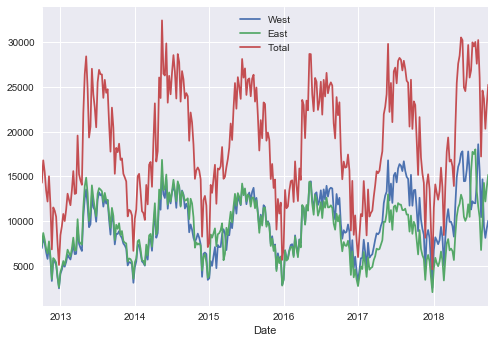

In [12]:
data.resample('W').sum().plot()

(0, 1080850.45)

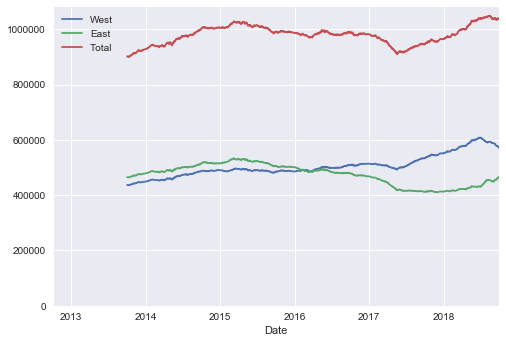

In [14]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

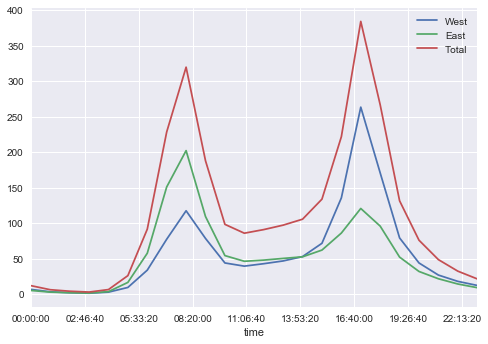

In [16]:
data.groupby(data.index.time).mean().plot()

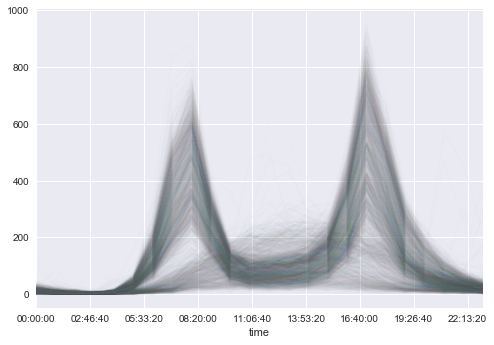

In [17]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

#### Go back to terminal to add, commit, and push these changes to Github cloud!

```
git add Bike_count_data.py
git commit -m 'cleaned up notebook'
git push origin master
```